In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
df_cleaned = pd.read_csv("wine_clean.csv")

In [3]:
df_cleaned

,title,price,grape,closure_type,country,characteristics,type,alcohol_percentage,region,style,year
0,Bread & Butter 'Winemaker's Selection' Chardon...,15.99,Chardonnay,Natural Cork,USA,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",White,13.5,California,Rich & Toasty,2021
1,"Oyster Bay Sauvignon Blanc 2022, Marlborough",12.49,Sauvignon Blanc,Screwcap,New Zealand,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",White,13.0,Marlborough,Crisp & Zesty,2022
2,Louis Latour Mâcon-Lugny 2021/22,17.99,Chardonnay,Natural Cork,France,"Peach, Apricot, Floral, Lemon",White,13.5,Burgundy,Ripe & Rounded,2022
3,Bread & Butter 'Winemaker's Selection' Pinot N...,15.99,Pinot Noir,Natural Cork,USA,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",Red,13.5,California,Smooth & Mellow,2021
4,"LB7 Red 2020/21, Lisbon",8.99,Castelão,Natural Cork,Portugal,"Spice, Black Fruit, Black Plum, Blackberry",Red,13.5,Lisboa,Rich & Juicy,2021
...,...,...,...,...,...,...,...,...,...,...,...
1007,"Viñalba Malbec-Bonarda 2019/20/21, Mendoza",9.99,Malbec,Natural Cork,Argentina,"Violet, Black Fruit, Floral, Red Fruit, Ripe F...",Red,14.0,Mendoza,Soft & Fruity,2021
1008,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",11.99,Chenin Blanc,Natural Cork,France,"Quince, Green Apple, Lemon, Pear",White,12.5,Loire,Aromatic & Floral,2021
1009,"Waimea Estates Pinot Noir Rosé 2021, Nelson",13.99,Pinot Noir,Screwcap,New Zealand,"Floral, Raspberry, Red Cherry, Strawberry",Rosé,13.0,Nelson,Delicate & Dry,2021
1010,Wakefield 'Visionary' Cabernet Sauvignon 2010,85.00,Cabernet Sauvignon,Screwcap,Australia,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",Red,13.5,South Australia,Savoury & Full Bodied,2010


<h1 style="color: #800020;"> EDA| Exploratory Data Analysis </h1>

<h3 style="color: #800020;"> Exploring numerical and categorical variable </h3>

In [4]:
categorical= df_cleaned.select_dtypes(exclude="number")

In [5]:
numerical= df_cleaned.select_dtypes(include="number")

<h3 style="color: #800020;"> Univariate analysis </h3>

<h4 style="color: #800020;"> Categorical Variables</h4>

I will start by doing univarite analyses for better understanding of each column

In [6]:
frequency_table_country= df_cleaned.country.value_counts()
frequency_table_country=frequency_table_country.reset_index()

In [7]:
proportion_table_country = df_cleaned.country.value_counts(normalize=True).round(2)
proportion_table_country= proportion_table_country.reset_index()

In [8]:
country_table= pd.concat([frequency_table_country,proportion_table_country], axis=1)
country_table.columns = ['country', 'count', 'country_prop', 'proportion']
country_table

,country,count,country_prop,proportion
0,France,373,France,0.37
1,Italy,122,Italy,0.12
2,New Zealand,88,New Zealand,0.09
3,Australia,87,Australia,0.09
4,Spain,76,Spain,0.08
5,South Africa,70,South Africa,0.07
6,USA,45,USA,0.04
7,Chile,45,Chile,0.04
8,Argentina,38,Argentina,0.04
9,Portugal,28,Portugal,0.03


Upon analysing the frequency and proportion tables, I can conclude that the majority of the wines present in this data set are from France and Italy. New Zealand, Australia and Spain close the top 5.

In [9]:
frequency_table_region= df_cleaned.region.value_counts()
frequency_table_region=frequency_table_region.reset_index()

In [10]:
proportion_table_region = df_cleaned.region.value_counts(normalize=True).round(2)
proportion_table_region= proportion_table_region.reset_index()

In [11]:
region_table= pd.concat([frequency_table_region,proportion_table_region], axis=1)
region_table.columns = ['region', 'count', 'region_prop', 'proportion']
region_table

,region,count,region_prop,proportion
0,Burgundy,97,Burgundy,0.10
1,Marlborough,62,Marlborough,0.06
2,Bordeaux,56,Bordeaux,0.06
3,South Australia,56,South Australia,0.06
4,Loire,50,Loire,0.05
...,...,...,...,...
83,Dao,1,Dao,0.00
84,Constantia,1,Constantia,0.00
85,Trentino Alto Adige,1,Trentino Alto Adige,0.00
86,Waipara,1,Waipara,0.00


Upon analysing the frequency and proportion tables, I can conclude that the majority of regions where the wines are produced are Burgundy in France going along with the analysis we did prior on the countries, followed by Marlborough in New Zealand even though Italy comes in second place in the countries table. Bordeaux, South Australia and Loire close the top 5 regions.

In [12]:
frequency_table_grape= df_cleaned.grape.value_counts()
frequency_table_grape=frequency_table_grape.reset_index()

In [13]:
proportion_table_grape = df_cleaned.grape.value_counts(normalize=True).round(2)
proportion_table_grape=proportion_table_grape.reset_index()

In [14]:
grape_table= pd.concat([frequency_table_grape,proportion_table_grape], axis=1)
grape_table.columns = ['grape', 'count', 'grape_prop', 'proportion']
grape_table

,grape,count,grape_prop,proportion
0,Chardonnay,142,Chardonnay,0.14
1,Sauvignon Blanc,95,Sauvignon Blanc,0.09
2,Cabernet Sauvignon,82,Cabernet Sauvignon,0.08
3,Pinot Noir,79,Pinot Noir,0.08
4,Grenache,77,Grenache,0.08
...,...,...,...,...
94,Pinot Blanc,1,Pinot Blanc,0.00
95,Rkatsiteli,1,Rkatsiteli,0.00
96,Syrah-Shiraz,1,Syrah-Shiraz,0.00
97,Sauvignon Gris,1,Sauvignon Gris,0.00


Upon analysing the frequency and proportion tables, I can conclude that the most used grapes are Chardonnay, Sauvignon Blanc and Cabernet Sauvignon from the Burgundy region which again goes along with the analysis I did before, ending the top 5 with Pinot Grigio and Grenache.

In [15]:
frequency_table_closure= df_cleaned.closure_type.value_counts()
frequency_table_closure=frequency_table_closure.reset_index()

In [16]:
proportion_table_closure = df_cleaned.closure_type.value_counts(normalize=True).round(2)
proportion_table_closure=proportion_table_closure.reset_index()

In [17]:
closure_table= pd.concat([frequency_table_closure,proportion_table_closure], axis=1)
closure_table.columns = ['closure', 'count', 'closure_prop', 'proportion']
closure_table

,closure,count,closure_prop,proportion
0,Natural Cork,607,Natural Cork,0.60
1,Screwcap,377,Screwcap,0.37
2,Synthetic Cork,21,Synthetic Cork,0.02
3,Vinolok,7,Vinolok,0.01


Both proportion and frequency table shows that Natural Cork (607) is the most common closure type, indicating a preference for tradition in winemaking. Screwcaps (377) are also widely used, reflecting modern trends in convenience and practicality. Synthetic Cork (21) and Vinolok (7) are niche options, likely catering to specific styles or experimental approaches. Exploring correlations with price, region, or wine style could reveal deeper insights into these patterns

In [18]:
frequency_table_type= df_cleaned.type.value_counts()
frequency_table_type=frequency_table_type.reset_index()

In [19]:
proportion_table_type = df_cleaned.type.value_counts(normalize=True).round(2)
proportion_table_type=proportion_table_type.reset_index()

In [20]:
type_table= pd.concat([frequency_table_type,proportion_table_type], axis=1)
type_table.columns = ['wine_type', 'count', 'wine_type_prop', 'proportion']
type_table

,wine_type,count,wine_type_prop,proportion
0,Red,521,Red,0.51
1,White,409,White,0.40
2,Rosé,80,Rosé,0.08
3,Orange,2,Orange,0.00


Lastly upon analysing the wine types present in the data set, I can conclude that Red wines dominate the dataset (51%) which confirms the past information I got since France is one of the biggest contributers of Red and White wines, followed by White wines (40%), Rosé wines (8%), and Orange wines (0%) with only 2 wines.

<h3 style="color: #800020;"> Visualizations </h3>

In [21]:
country_table_5= country_table.head(5)

In [22]:
region_table_5= region_table.head(5)

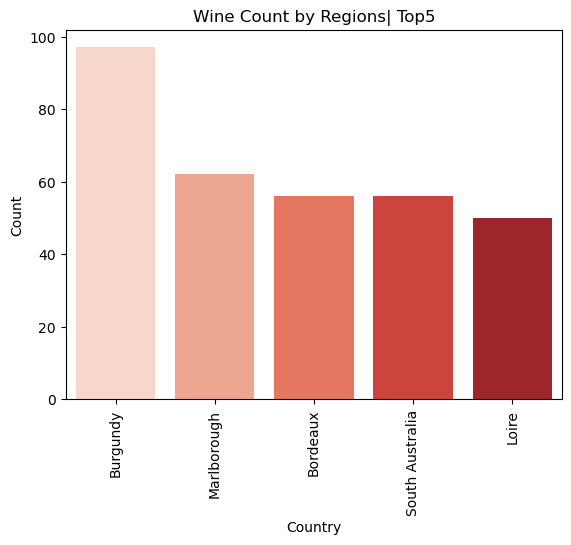

In [23]:
sns.barplot(x="region", y="count", data= region_table_5, palette= "Reds")
plt.title("Wine Count by Regions| Top5")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

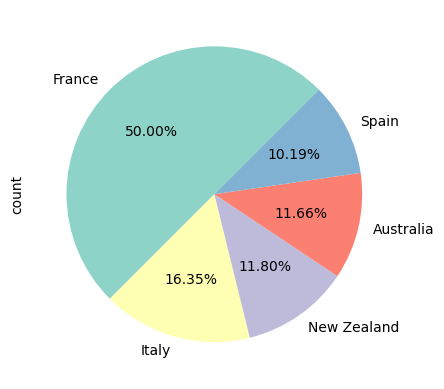

In [24]:
country_table_5["count"].plot.pie(labels=country_table_5["country"],autopct='%1.2f%%' ,startangle=45, colors=sns.color_palette('Set3'))
plt.show()

Upon analyzing the pie chart I can conclude that France leads by a wide margin, showing its dominance in this dataset and possibly the global wine industry.
The remaining countries contribute relatively smaller but still notable proportions, indicating a diversified representation of wines from across the globe.
New World wine regions (New Zealand and Australia) are well-represented, highlighting their rising popularity.

By looking at the bar plot of the top 5 regions I can afirm that France maintains a dominant position, both in the country and region categories, with Burgundy contributing significantly to its high-value share.
New Zealand and Australia show the rise of New World wines, with Marlborough and South Australia both contributing.
This combined analysis of countries and regions highlights the diversity of wine offerings across the globe and underscores the prominence of both Old and New World wine regions in shaping the global market.

<h4 style="color: #800020;"> Numerical Variables</h4>

In [25]:
df_cleaned.describe()

,price,alcohol_percentage,year
count,1012.00000,1012.000000,1012.000000
mean,23.13501,13.470652,2020.166008
std,20.72089,1.150675,2.297832
min,4.99000,0.500000,1999.000000
25%,11.99000,13.000000,2019.000000
50%,15.99000,13.500000,2021.000000
75%,25.99000,14.000000,2022.000000
max,270.00000,16.000000,2023.000000


- Insights I draw from the describe()

Starting by the price, the average price of the wines in the dataset is 23.14 dollars, which suggests that the wines in this collection are generally mid-range, though there are a few quite expensive wines.The minimum price is 4.99 dollars, indicating the presence of affordable wines, while the maximum price is 270.00 dollars, representing premium wines. Regarding the standard deviation of 20.72 dollars , this wide variation in price suggests the dataset includes a big range of wine types, from budget friendly options to more luxury wines.

Passing to Alcohol Percentage, the average is 13.47%, which is typical for many wine styles, especially reds and whites. The minimum alcohol percentage is extremely low at 0.5%, which could represent light wines, while the maximum alcohol percentage is 16%, common in stronger wines.The standard deviation of 1.15% shows that most wines in this dataset fall within a very small range of alcohol content meaning that there is no much variation of percentages.

<h4 style="color: #800020;"> Shape of distribution - Skewness </h4>

In [26]:
df_cleaned["price"].skew().round(2)

4.59

In [27]:
df_cleaned["alcohol_percentage"].skew().round(2)

-4.69

The price distribution is highly positively skewed, meaning that while most wines are priced in a mid-range, there are a few very expensive outliers that push the average price higher.

The alcohol percentage distribution is negatively skewed, indicating that most wines have higher alcohol content, but there are a few wines with very low alcohol content that skew the data to the left.

<h4 style="color: #800020;"> Shape of distribution - Kurtosis </h4>

In [28]:
df_cleaned["price"].kurtosis().round(2)

34.89

In [29]:
df_cleaned["alcohol_percentage"].kurtosis().round(2)

47.86

The price distribution has a kurtosis of 34.89 which indicates a heavy concentration around the mean, but there are extreme outliers, particularly with very high-priced wines.

A kurtosis of 47.86 indicates extremely high kurtosis for alcohol percentage as well, which means the distribution is highly leptokurtic with a sharp peak and heavy tails. The dataset likely has a large cluster of wines with similar alcohol percentage but also contains extreme outliers, in this case wines with very low alcohol content as seen before.

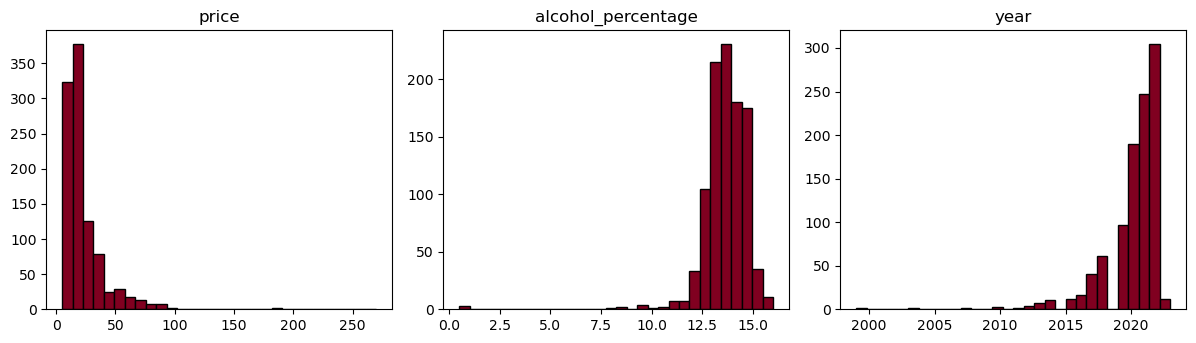

In [30]:
color = '#800020'

nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(numerical.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(numerical.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(numerical.columns[i])

plt.tight_layout()
plt.show()

By looking at this histograms I can draw some conclusions such as:

Regarding price, the distribution is positively skewed (right-skewed), with most wine prices concentrated below 50.
A few wines are priced higher, exceeding 200, which appear as outliers.

The alcohol percentage distribution is approximately normal, centered around 12.5-14%. Very few wines have alcohol percentages below 10% or above 15%, which are possible outliers.

Lastly, most wines in the dataset are recent, with a sharp increase in wine production or recording after 2015.Older wines are rare, representing potential outliers.

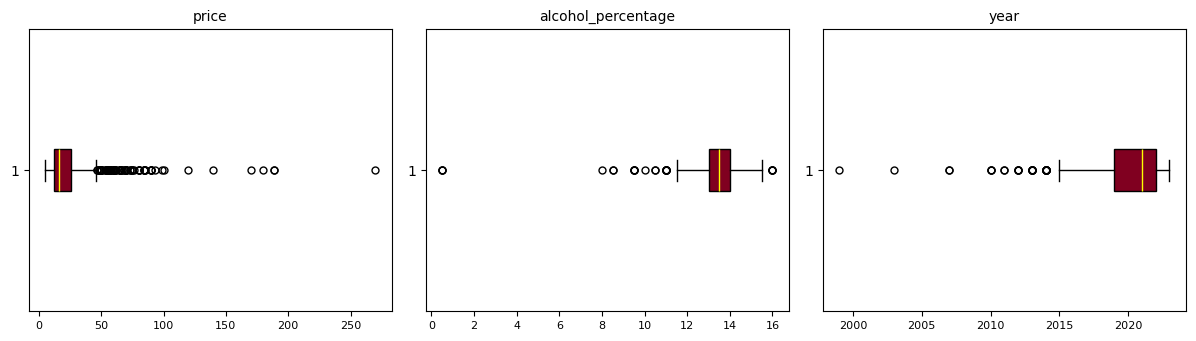

In [31]:
color = '#800020'

nrows, ncols = 5, 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(numerical.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(numerical.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(numerical.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

By analysing teh boxplots I can conclude:

The price boxplot confirms the positive skew, with a tightly packed interquartile range (IQR) below 50. There are several outliers above the upper whisker, extending well beyond 250. Meaning that there are some premium wines pushing the mean of the price up.

Nest, the majority of alcohol percentages lie within the typical range of 12-15%. A few outliers exist below 10% and above 15%, likely representing non-standard wines.

Lastly, most data points are concentrated post 2015, with a relatively small IQR. Older wines are outliers, and there is a general trend toward more recent data.

<h3 style="color: #800020;"> Bivariate analysis </h3>

The main question of this analysis is if the wine type and the country where the wine is produced have a strong correlation. The main question is , "does the country where the wine is produced has direct influence on the wine type?"

In [32]:
crosstab_result=pd.crosstab(df_cleaned["type"], df_cleaned["country"])
crosstab_result

country,Argentina,Australia,Austria,Bulgaria,Chile,England,France,Georgia,Germany,Greece,Italy,Lebanon,Moldova,New Zealand,Portugal,Romania,South Africa,Spain,USA
type,,,,,,,,,,,,,,,,,,,
Orange,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Red,32,59,1,1,26,1,162,1,2,2,73,2,1,23,15,2,32,57,29
Rosé,1,1,0,0,1,2,49,0,0,0,12,0,0,4,2,0,3,4,1
White,5,27,8,0,17,5,162,1,7,3,37,0,0,61,11,0,35,15,15


The stacked bar chart started repaeting the colours of the countries making it hard to analyze. 
Therefore i will create now a list of colours to ensure that each country has its own colour

In [58]:
colors = colors = sns.color_palette("tab20", n_colors=19)

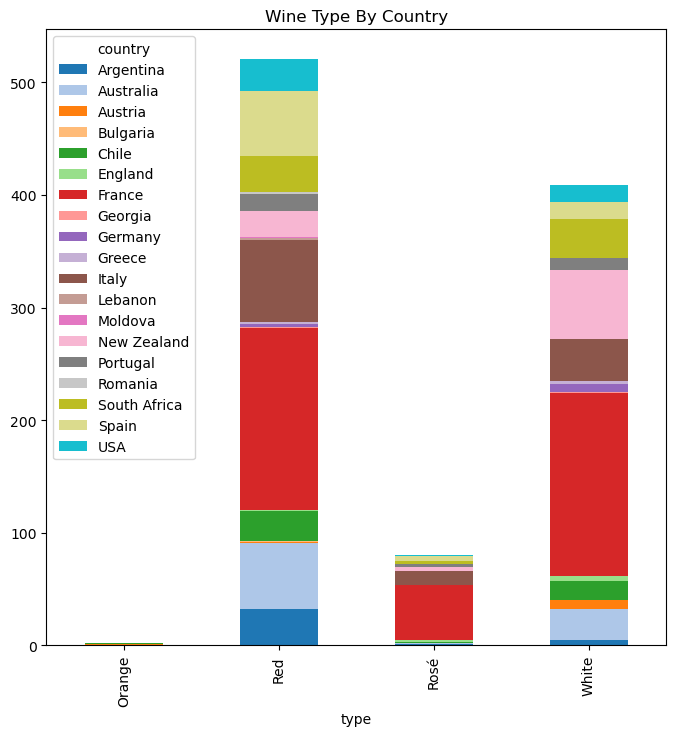

In [59]:
crosstab_result.plot(kind="bar",stacked= True, figsize=(8, 8), color=colors)
plt.title ("Wine Type By Country")
plt.show()

In the Stacked Bar Chart I am comparing the contribution of each country to the four wine types.

I could draw some conclusions:

• France leads in wine production across all categories, with a major focus on red and white wines.

• There is a clear imbalance in the global production of wine types, with red wine being the most dominant, followed by white wine.

• Orange wine remains a niche category, with Austria and Chile being its primary producer.

<h2 style="color: #800020;"> Hypothesis Testing </h2>

<h4 style="color: #800020;"> Chi-square test </h4>

The hypothesis I am testing:

Null Hypothesis (H₀): There is no relationship between country and the wine type.

Alternative Hypothesis (H₁): There is a relationship between country and the wine type.

In [35]:
from scipy.stats import chi2_contingency

In [36]:
chi2_stats, chi2_pvalue, _, _= chi2_contingency(crosstab_result)
chi2_pvalue

9.868753664500571e-18

By checking the chi-square result, there is strong evidence to conclude that there is a significant relationship between the country where the wine is produced and the type of wine. In other words, the country does have a direct influence on the wine type possibly due to factors such as climate, culture, or grape variety that influence the production of certain wine styles. In conclusion I reject the null hypothesis

In [37]:
from scipy.stats.contingency import association

In [38]:
association(crosstab_result, method="cramer")

0.25304088235584726

While the chi-squared test shows a strong statistical significance between the 2 variables, the moderate association (Cramér's V = 0.253) implies that while the country has an influence on wine types, the strength of this influence is moderate, and there may be other contributing factors like regional preferences, production methods, or availability of grape varieties in those countries.

<h2 style="color: #800020;"> Bonus- Price Vs Country Visualization </h2>

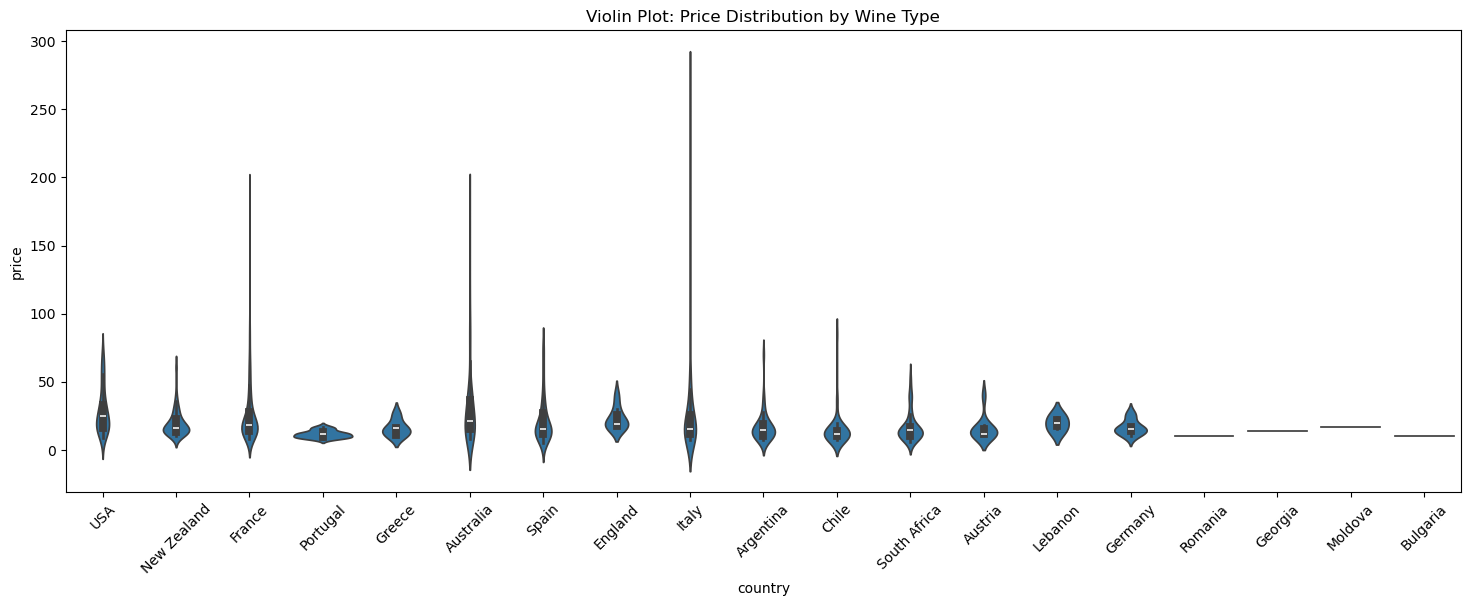

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot for Price vs Wine Type
plt.figure(figsize=(18, 6))
sns.violinplot(x='country', y='price', data=df_cleaned)
plt.title('Violin Plot: Price Distribution by Wine Type')
plt.xticks(rotation=45)
plt.show()

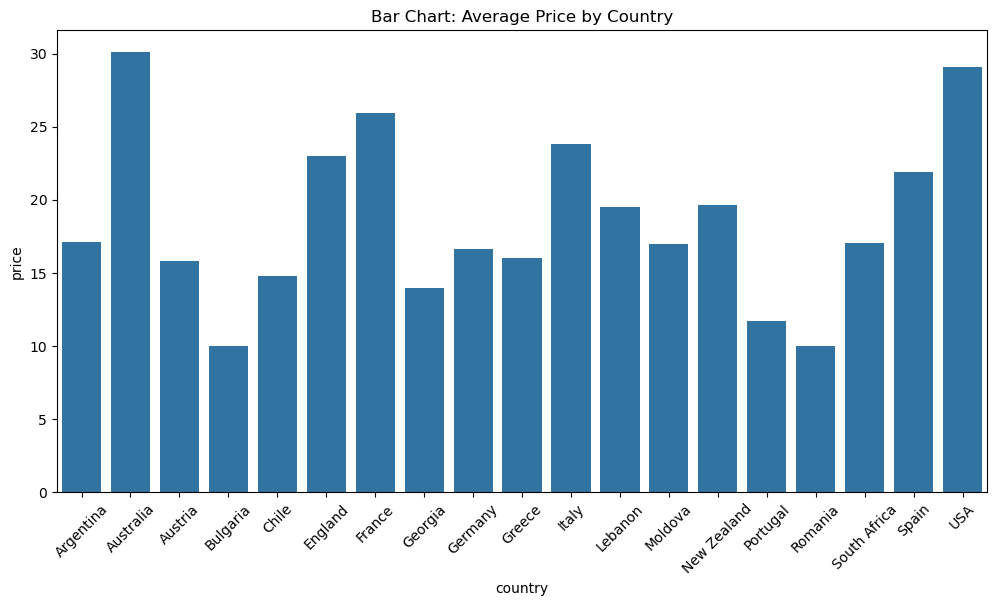

In [69]:
avg_price = df_cleaned.groupby('country')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='price', data=avg_price)
plt.title('Bar Chart: Average Price by Country')
plt.xticks(rotation=45)
plt.show()